 ###### Pool_card   -> # de Cartas que o usuário ja selecionou
 ###### Pack_card   -> # de Cartas que saíram no pacote em questão
 ###### Pack_Number -> # Rodada do pack atual
 ###### Pick_Number -> # Rodada do pick atual

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [3]:
#Read all_decks file and get integer columns
df_deck = pd.read_csv("Data/df_stops.csv",nrows=1)
#(columns int64 -> int8)
columns = []
for column in df_deck.columns.unique():
    if 'pool_' in column:
        columns.append(column)
    if 'pack_card_' in column:
        columns.append(column)

# Make the dtype dict (int64 -> int8)
conversion_integers_columns = {item: np.int8 for item in columns}
conversion_integers_columns['user_game_win_rate_bucket'] = np.float32
conversion_integers_columns['pick'] = 'category'

In [4]:
df_deck = pd.read_csv("Data/df_stops.csv",dtype=conversion_integers_columns)
#best_users_df = pd.read_csv("Data/draft_data_best_players_sc.csv",dtype=conversion_integers_columns)

# Data Exploration

In [5]:
df_deck.head(2)

,expansion,event_type,draft_id,draft_time,rank,event_match_wins,event_match_losses,pack_number,pick_number,pick,pick_maindeck_rate,pick_sideboard_in_rate,"pack_card_Andúril, Flame of the West","pack_card_Aragorn, Company Leader","pack_card_Aragorn, the Uniter",pack_card_Arwen Undómiel,pack_card_Arwen's Gift,"pack_card_Arwen, Mortal Queen",pack_card_Bag End Porter,pack_card_Banish from Edoras,pack_card_Barad-dûr,pack_card_Barrow-Blade,pack_card_Battle-Scarred Goblin,pack_card_Bewitching Leechcraft,"pack_card_Bilbo, Retired Burglar","pack_card_Bill Ferny, Bree Swindler",pack_card_Bill the Pony,pack_card_Birthday Escape,pack_card_Bitter Downfall,pack_card_Bombadil's Song,pack_card_Book of Mazarbul,pack_card_Borne Upon a Wind,"pack_card_Boromir, Warden of the Tower",pack_card_Brandywine Farmer,pack_card_Breaking of the Fellowship,"pack_card_Butterbur, Bree Innkeeper",pack_card_Call of the Ring,pack_card_Captain of Umbar,pack_card_Cast into the Fire,pack_card_Celeborn the Wise,pack_card_Chance-Met Elves,pack_card_Cirith Ungol Patrol,pack_card_Claim the Precious,pack_card_Council's Deliberation,pack_card_Deceive the Messenger,pack_card_Delighted Halfling,"pack_card_Denethor, Ruling Steward",pack_card_Display of Power,pack_card_Doors of Durin,pack_card_Dreadful as the Storm,pack_card_Dunland Crebain,pack_card_Dúnedain Blade,pack_card_Dúnedain Rangers,pack_card_Eagles of the North,pack_card_East-Mark Cavalier,pack_card_Easterling Vanguard,pack_card_Eastfarthing Farmer,"pack_card_Elrond, Lord of Rivendell","pack_card_Elrond, Master of Healing",pack_card_Elven Chorus,pack_card_Elven Farsight,pack_card_Enraged Huorn,pack_card_Ent's Fury,pack_card_Ent-Draught Basin,pack_card_Entish Restoration,pack_card_Erebor Flamesmith,"pack_card_Erkenbrand, Lord of Westfold",pack_card_Errand-Rider of Gondor,pack_card_Escape from Orthanc,pack_card_Esquire of the King,pack_card_Fall of Cair Andros,pack_card_Fall of Gil-galad,"pack_card_Fangorn, Tree Shepherd","pack_card_Faramir, Field Commander","pack_card_Faramir, Prince of Ithilien","pack_card_Fear, Fire, Foes!",pack_card_Fiery Inscription,pack_card_Fire of Orthanc,pack_card_Flame of Anor,pack_card_Flowering of the White Tree,pack_card_Fog on the Barrow-Downs,pack_card_Foray of Orcs,pack_card_Forest,pack_card_Forge Anew,pack_card_Friendly Rivalry,pack_card_Frodo Baggins,"pack_card_Frodo, Sauron's Bane",pack_card_Galadhrim Bow,pack_card_Galadhrim Guide,pack_card_Galadriel of Lothlórien,pack_card_Gandalf the Grey,pack_card_Gandalf the White,pack_card_Gandalf's Sanction,"pack_card_Gandalf, Friend of the Shire",pack_card_Generous Ent,pack_card_Gift of Strands,pack_card_Gimli's Axe,pack_card_Gimli's Fury,"pack_card_Gimli, Counter of Kills","pack_card_Gimli, Mournful Avenger",pack_card_Glamdring,"pack_card_Glorfindel, Dauntless Rescuer",pack_card_Glorious Gale,"pack_card_Glóin, Dwarf Emissary",pack_card_Goblin Fireleaper,"pack_card_Goldberry, River-Daughter",pack_card_Gollum's Bite,"pack_card_Gollum, Patient Plotter",pack_card_Gorbag of Minas Morgul,"pack_card_Gothmog, Morgul Lieutenant",pack_card_Great Hall of the Citadel,pack_card_Grey Havens Navigator,"pack_card_Grishnákh, Brash Instigator","pack_card_Grond, the Gatebreaker",pack_card_Gríma Wormtongue,pack_card_Gwaihir the Windlord,pack_card_Haradrim Spearmaster,pack_card_Haunt of the Dead Marshes,pack_card_Hew the Entwood,pack_card_Hithlain Knots,pack_card_Hobbit's Sting,pack_card_Horn of Gondor,pack_card_Horn of the Mark,pack_card_Horses of the Bruinen,pack_card_Improvised Club,pack_card_Inherited Envelope,pack_card_Ioreth of the Healing House,pack_card_Isildur's Fateful Strike,pack_card_Island,pack_card_Isolation at Orthanc,pack_card_Ithilien Kingfisher,pack_card_King of the Oathbreakers,pack_card_Knights of Dol Amroth,"pack_card_Landroval, Horizon Witness",pack_card_Lash of the Balrog,pack_card_Last March of the Ents,"pack_card_Legolas, Counter of Kills","pack_card_Legolas, Master Archer",pack_card_Lembas,pack_card_Lobelia Sackville-Baggins,pack_card_

<Axes: xlabel='rank', ylabel='user_game_win_rate_bucket'>

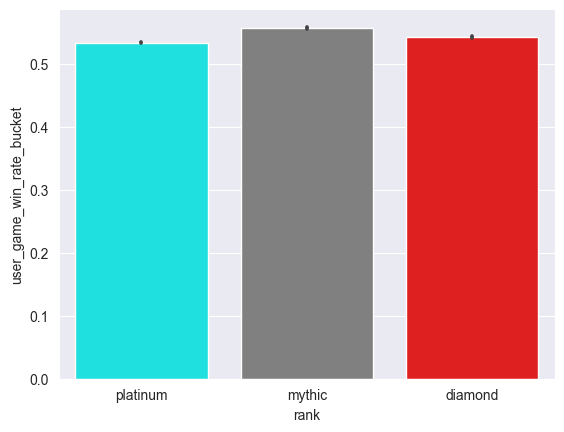

In [6]:
sns.barplot(df_deck,x=df_deck['rank'], y=df_deck['user_game_win_rate_bucket'],estimator='mean', palette=['cyan', 'gray', 'red'])

<Axes: xlabel='rank', ylabel='user_n_games_bucket'>

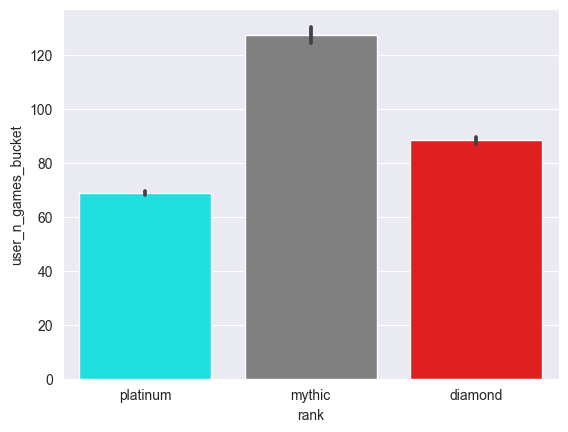

In [7]:
sns.barplot(df_deck,x=df_deck['rank'], y=df_deck['user_n_games_bucket'], palette=['cyan', 'gray', 'red'])

### First step -> Make the sinergy between the cards
    Sinergy = Quantity of if one card appears on one deck -> this other card will appears too.

In [8]:
df_deck.head(2)

,expansion,event_type,draft_id,draft_time,rank,event_match_wins,event_match_losses,pack_number,pick_number,pick,pick_maindeck_rate,pick_sideboard_in_rate,"pack_card_Andúril, Flame of the West","pack_card_Aragorn, Company Leader","pack_card_Aragorn, the Uniter",pack_card_Arwen Undómiel,pack_card_Arwen's Gift,"pack_card_Arwen, Mortal Queen",pack_card_Bag End Porter,pack_card_Banish from Edoras,pack_card_Barad-dûr,pack_card_Barrow-Blade,pack_card_Battle-Scarred Goblin,pack_card_Bewitching Leechcraft,"pack_card_Bilbo, Retired Burglar","pack_card_Bill Ferny, Bree Swindler",pack_card_Bill the Pony,pack_card_Birthday Escape,pack_card_Bitter Downfall,pack_card_Bombadil's Song,pack_card_Book of Mazarbul,pack_card_Borne Upon a Wind,"pack_card_Boromir, Warden of the Tower",pack_card_Brandywine Farmer,pack_card_Breaking of the Fellowship,"pack_card_Butterbur, Bree Innkeeper",pack_card_Call of the Ring,pack_card_Captain of Umbar,pack_card_Cast into the Fire,pack_card_Celeborn the Wise,pack_card_Chance-Met Elves,pack_card_Cirith Ungol Patrol,pack_card_Claim the Precious,pack_card_Council's Deliberation,pack_card_Deceive the Messenger,pack_card_Delighted Halfling,"pack_card_Denethor, Ruling Steward",pack_card_Display of Power,pack_card_Doors of Durin,pack_card_Dreadful as the Storm,pack_card_Dunland Crebain,pack_card_Dúnedain Blade,pack_card_Dúnedain Rangers,pack_card_Eagles of the North,pack_card_East-Mark Cavalier,pack_card_Easterling Vanguard,pack_card_Eastfarthing Farmer,"pack_card_Elrond, Lord of Rivendell","pack_card_Elrond, Master of Healing",pack_card_Elven Chorus,pack_card_Elven Farsight,pack_card_Enraged Huorn,pack_card_Ent's Fury,pack_card_Ent-Draught Basin,pack_card_Entish Restoration,pack_card_Erebor Flamesmith,"pack_card_Erkenbrand, Lord of Westfold",pack_card_Errand-Rider of Gondor,pack_card_Escape from Orthanc,pack_card_Esquire of the King,pack_card_Fall of Cair Andros,pack_card_Fall of Gil-galad,"pack_card_Fangorn, Tree Shepherd","pack_card_Faramir, Field Commander","pack_card_Faramir, Prince of Ithilien","pack_card_Fear, Fire, Foes!",pack_card_Fiery Inscription,pack_card_Fire of Orthanc,pack_card_Flame of Anor,pack_card_Flowering of the White Tree,pack_card_Fog on the Barrow-Downs,pack_card_Foray of Orcs,pack_card_Forest,pack_card_Forge Anew,pack_card_Friendly Rivalry,pack_card_Frodo Baggins,"pack_card_Frodo, Sauron's Bane",pack_card_Galadhrim Bow,pack_card_Galadhrim Guide,pack_card_Galadriel of Lothlórien,pack_card_Gandalf the Grey,pack_card_Gandalf the White,pack_card_Gandalf's Sanction,"pack_card_Gandalf, Friend of the Shire",pack_card_Generous Ent,pack_card_Gift of Strands,pack_card_Gimli's Axe,pack_card_Gimli's Fury,"pack_card_Gimli, Counter of Kills","pack_card_Gimli, Mournful Avenger",pack_card_Glamdring,"pack_card_Glorfindel, Dauntless Rescuer",pack_card_Glorious Gale,"pack_card_Glóin, Dwarf Emissary",pack_card_Goblin Fireleaper,"pack_card_Goldberry, River-Daughter",pack_card_Gollum's Bite,"pack_card_Gollum, Patient Plotter",pack_card_Gorbag of Minas Morgul,"pack_card_Gothmog, Morgul Lieutenant",pack_card_Great Hall of the Citadel,pack_card_Grey Havens Navigator,"pack_card_Grishnákh, Brash Instigator","pack_card_Grond, the Gatebreaker",pack_card_Gríma Wormtongue,pack_card_Gwaihir the Windlord,pack_card_Haradrim Spearmaster,pack_card_Haunt of the Dead Marshes,pack_card_Hew the Entwood,pack_card_Hithlain Knots,pack_card_Hobbit's Sting,pack_card_Horn of Gondor,pack_card_Horn of the Mark,pack_card_Horses of the Bruinen,pack_card_Improvised Club,pack_card_Inherited Envelope,pack_card_Ioreth of the Healing House,pack_card_Isildur's Fateful Strike,pack_card_Island,pack_card_Isolation at Orthanc,pack_card_Ithilien Kingfisher,pack_card_King of the Oathbreakers,pack_card_Knights of Dol Amroth,"pack_card_Landroval, Horizon Witness",pack_card_Lash of the Balrog,pack_card_Last March of the Ents,"pack_card_Legolas, Counter of Kills","pack_card_Legolas, Master Archer",pack_card_Lembas,pack_card_Lobelia Sackville-Baggins,pack_card_

In [41]:
# Get card list
card_list = []
for column in df_deck.columns.unique():
    if 'pool_' in column:
        card = column.replace('pool_','')
        card_list.append(card)

In [10]:
# Build the co-occurrence matrix from frequency
frequenciy_matrix = np.array(df_deck[["pool_" + c for c in card_list]].astype(int))
cooccurrence_matrix = np.dot(frequenciy_matrix.transpose(),frequenciy_matrix)
cooccurrence_matrix_diagonal = np.diagonal(cooccurrence_matrix)

Text(0.5, 1.0, 'Co-occurrence matrix')

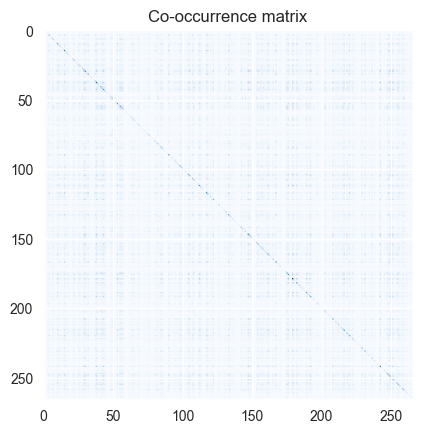

In [19]:
plt.imshow(np.array(cooccurrence_matrix), cmap="Blues");
plt.title('Co-occurrence matrix')

Share of card combinations that never happened:  4%


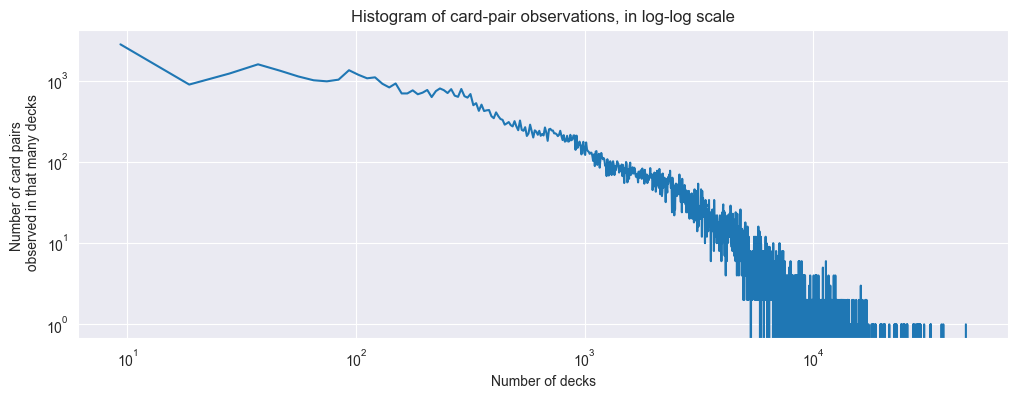

In [12]:
print(f"Share of card combinations that never happened: {np.sum(cooccurrence_matrix.flatten()==0)/cooccurrence_matrix.flatten().shape[0]*100:2.0f}%")

ty, tx = np.histogram(cooccurrence_matrix.flatten(), bins=5000)
plt.figure(figsize=(12,4))
plt.plot(tx[1:], ty);
plt.yscale('log')
plt.xscale('log')
plt.title('Histogram of card-pair observations, in log-log scale')
plt.xlabel('Number of decks')
plt.ylabel('Number of card pairs \n observed in that many decks');

In [20]:
# List of cards that weren't drafted, but are in the db
resumed_card_list = card_list.copy()
occurrences = df_deck[["pool_" + c for c in card_list]].sum()
for i in range(len(card_list)):
    if occurrences[i] == 0:
        resumed_card_list.pop(i)
        print(str(i) + " " + card_list[i])

70 Forest
116 Island
152 Mountain
172 Plains
230 Swamp


In [22]:
#sort ocurrences
occurrences.sort_values(ascending=False)

pool_Rally at the Hornburg    22908
pool_The Torment of Gollum    21127
pool_Dunland Crebain          20701
pool_Mordor Muster            18955
pool_Smite the Deathless      18231
                              ...  
pool_Island                       0
pool_Mountain                     0
pool_Forest                       0
pool_Plains                       0
pool_Swamp                        0
Length: 266, dtype: int64

In [23]:
all_cards_df = pd.read_csv('Data/ltr_cards_data.csv')
all_cards_LTR = all_cards_df['name']

In [24]:
#Verifica se alguma carta não foi considerada e remova ela do df
for name in all_cards_df['name'].to_list():
    if name not in card_list:
        all_cards_df = all_cards_df[all_cards_df.name != name]
        print(name)

Aragorn and Arwen, Wed
Assault on Osgiliath
Bilbo's Ring
Elanor Gardner
Elvish Mariner
Fires of Mount Doom
Frodo, Determined Hero
Galadriel, Gift-Giver
Gandalf, White Rider
Goblin Assailant
Gollum, Scheming Guide
Knight of the Keep
Ringwraiths
Saradoc, Master of Buckland
Sauron, the Lidless Eye
The Balrog, Flame of Udûn
Trailblazer's Boots
Witch-king, Bringer of Ruin


### Data Resume ALL_CARDS

In [25]:
for card in card_list:
    all_cards_df.loc[all_cards_df.name == card,'count'] = len(df_deck[df_deck['pool_'+card] != 0])
    all_cards_df.loc[all_cards_df.name == card,'freq'] = df_deck['pool_'+card].sum()
    all_cards_df.loc[all_cards_df.name == card,'avr'] = df_deck['pool_'+card].sum()/df_deck.astype(bool).sum(axis=1).sum() # quantidade de cartas

In [26]:
all_cards_df.head(5)

,name,rarity,color_identity,cmc,colors,count,freq,avr
0,"Andúril, Flame of the West",mythic,T,3.0,T,987.0,987.0,0.000520
2,"Aragorn, Company Leader",rare,M,3.0,M,1266.0,1306.0,0.000688
3,"Aragorn, the Uniter",mythic,M,4.0,M,605.0,605.0,0.000319
4,"Arwen, Mortal Queen",mythic,M,3.0,M,745.0,746.0,0.000393
5,Arwen's Gift,common,U,4.0,U,10262.0,12864.0,0.006775


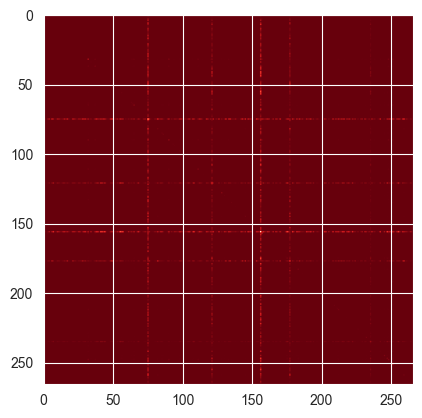

In [27]:
nDrafts = len(df_deck)

# Initialize the probability matrix
prob = cooccurrence_matrix.copy().astype(float) # Make a copy, and also make symmetric

freq = all_cards_df.loc[all_cards_df['freq'].notna(), 'freq'].values

for i in range(len(card_list)):
    for j in range(i+1):
        # Check if frequencies are non-zero
        if freq[i]>0 and freq[j]>0:
            try:
                # Normalize the co-occurrence by the product of frequencies
                prob[i,j] = cooccurrence_matrix[i,j]/(float(freq[i])*float(freq[j]))*nDrafts
                prob[j,i] = prob[i,j]
            except ZeroDivisionError:
                print(f"ZeroDivisionError occurred at i={i}, j={j}. freq[i]={freq[i]}, freq[j]={freq[j]}")
        #if j == i:
        #    prob[j,i] = 0

# Compute the distance matrix
dist = (1-0.99*prob/prob.max())

# Check if NaN values are present after normalization
if np.isnan(dist).any():
    print("Warning: dist matrix contains NaN values. This may cause errors in downstream calculations.")

# Visualize the distance matrix
plt.imshow(dist, cmap="Reds")
plt.show()

In [37]:
import sklearn.manifold as skm

try:
    # Check the dimensions of 'dist' and 'freq'
    assert len(dist.shape) == 2, "'dist' should be a 2-dimensional array or matrix"
    assert len(freq.shape) == 1, "'freq' should be a 1-dimensional array or list"

    # Make sure the dimensions of 'dist' matches the length of 'freq'
    assert dist.shape[0] == dist.shape[1] == len(freq), "Dimensions of 'dist' and 'freq' do not match"

    fit = skm.locally_linear_embedding(dist, n_components=2, n_neighbors=len(freq)-1)
    fit = fit[0] # For some reason it returns a tuple

    # Make sure the embedding has the expected shape
    assert fit.shape == (len(freq), 2), "Unexpected shape of embedding"

    all_cards_df['x'] = fit[:,0]
    all_cards_df['y'] = fit[:,1]

except AssertionError as e:
    print(f"Assertion error: {str(e)}")
except Exception as e:
    print(f"An error occurred: {str(e)}")

C:\Users\diego\Documents\Estudos\mtg_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


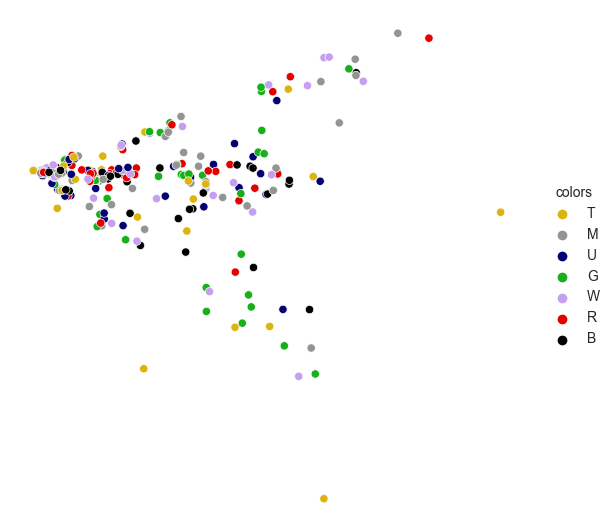

In [38]:
#%matplotlib inline
# U -> BLUE
# B -> BLACK
# M -> MULTI
myPal = sns.xkcd_palette(["gold","grey","deep blue","green","lavender","red","black"])
s = sns.relplot(data=all_cards_df,x="x",y="y",hue="colors",palette=myPal)
s.fig.set_size_inches(7,6)
sns.set_style("white")
s.despine(left=True,bottom=True)
s.set(xticklabels=[],yticklabels=[],xlabel='',ylabel='');

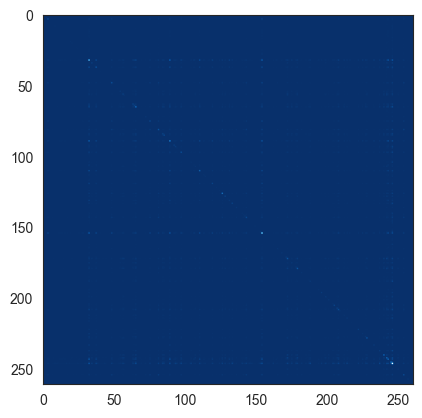

In [39]:
# Remove missing cards from other arrays
# (I make copies of both arrays for some reason, just in case)

dist2 = dist.copy()
dist2 = dist2[freq>0,:]
dist2 = dist2[:,freq>0] # For some reason if I try to subset both rows and columns together, it outputs something stupid
plt.imshow(dist2, cmap="Blues");

freq2 = freq[freq>0]

C:\Users\diego\Documents\Estudos\mtg_env\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


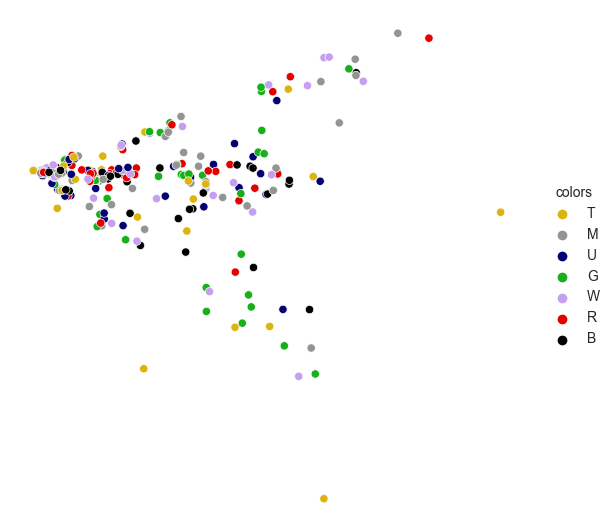

In [40]:
#%matplotlib inline
# U -> BLUE
# B -> BLACK
# M -> MULTI
myPal = sns.xkcd_palette(["gold","grey","deep blue","green","lavender","red","black"])
s = sns.relplot(data=all_cards_df,x="x",y="y",hue="colors",palette=myPal)
s.fig.set_size_inches(7,6)
sns.set_style("white")
s.despine(left=True,bottom=True)
s.set(xticklabels=[],yticklabels=[],xlabel='',ylabel='');